#Task 2 - Prediction Using Desicision Tree Classifier
###We are given a dataset named iris which contains the details of the flowers , the petal size and their sapal size . we need to create a decision tree classifier to perdict the type of flower based and petal and sepal features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Iris.csv')

In [2]:
df #printing the data frame to verify the conetents 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info() #seeing if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe() #understanding the dataset if it has outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df = df.drop(['Id'],axis = 1) #droping the id column as it has no weightage in finding the flower

##Data visualisation
###the values from the dataframe are ploted as scater plot with respect to the species to find the range of various features .

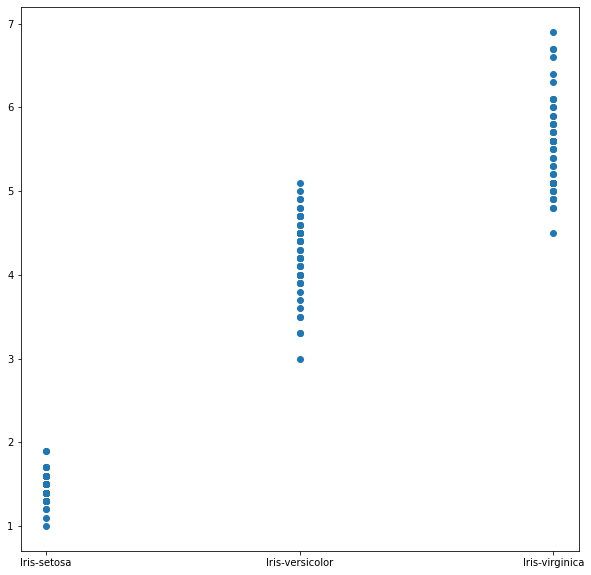

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df['Species'],df['PetalLengthCm'])


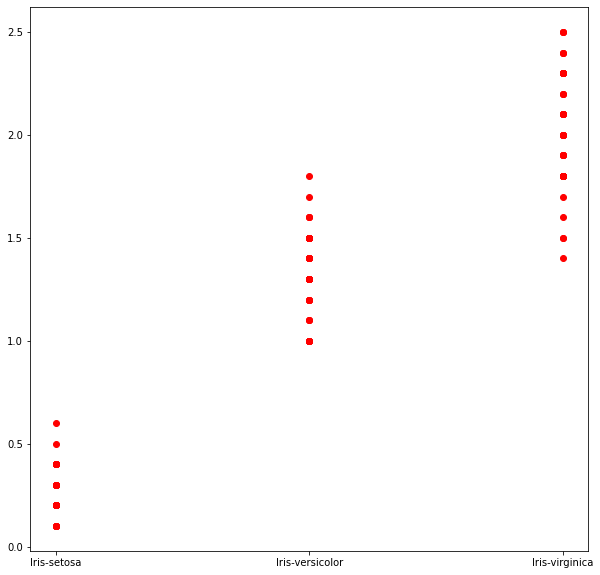

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df['Species'],df['PetalWidthCm'],color='red')


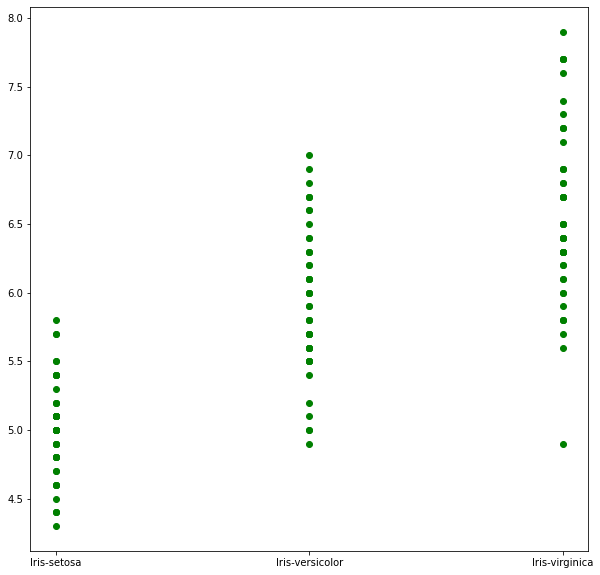

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df['Species'],df['SepalLengthCm'],color='green')


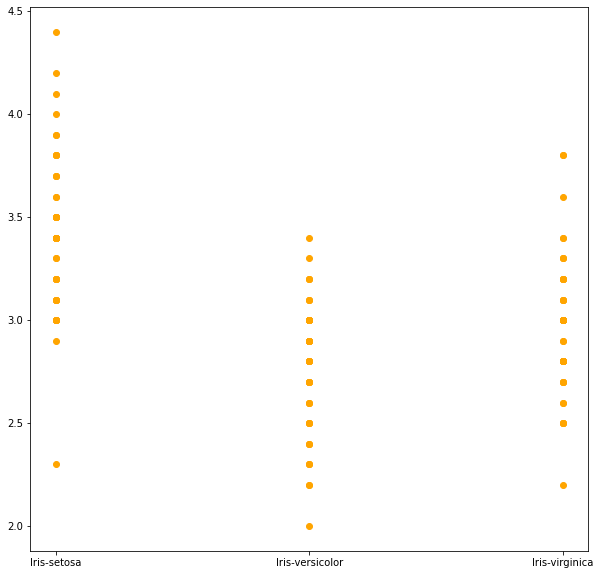

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(df['Species'],df['SepalWidthCm'],color='orange')


##Data Preparation

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [11]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

##Dividing the dataset into testing and traing part to build model

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size = 0.3)

In [13]:
X_train

array([[5.7, 3.8, 1.7, 0.3],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [6.5, 3. , 5.2, 2. ],
       [6.5, 3. , 5.8, 2.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [7.4, 2.8, 6.1, 1.9],
       [5.7, 2.8, 4.5, 1.3],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5. , 2.3, 3.3, 1. ],
       [5.3, 3.7, 1.5, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [6.7, 3.1, 5.6, 2.4],
       [5.1, 3.5, 1.4, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 2.6, 3.5, 1. ],
       [6.4, 3.2, 4.5, 1.5],
       [5.7, 2.8, 4.1, 1.3],
       [6.7, 3. , 5.2, 2.3],
       [5.1, 3.8, 1.6, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 3.4, 1.6, 0.4],
       [5.6, 2

In [14]:
y_train

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-ve

##scaling the data so that it has a fixed range and model can be easily fitted on the data

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Building the Model
###Building the decisison tree classifier model to predict the species of flower.

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_pred_test = dtc.predict(X_test)

##Evaluating the model
###the classification report is used to find all the values after evaluating the model.

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.90      1.00      0.95        19

       accuracy                           0.96        45
      macro avg       0.97      0.94      0.95        45
   weighted avg       0.96      0.96      0.95        45



[Text(334.8, 733.86, 'X[3] <= -0.503\nentropy = 1.579\nsamples = 105\nvalue = [35, 39, 31]'),
 Text(167.4, 570.78, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(502.20000000000005, 570.78, 'X[2] <= 0.723\nentropy = 0.991\nsamples = 70\nvalue = [0, 39, 31]'),
 Text(334.8, 407.70000000000005, 'X[3] <= 0.726\nentropy = 0.281\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(167.4, 244.62, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(502.20000000000005, 244.62, 'X[1] <= -0.203\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(334.8, 81.54000000000008, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(669.6, 81.54000000000008, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6, 407.70000000000005, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

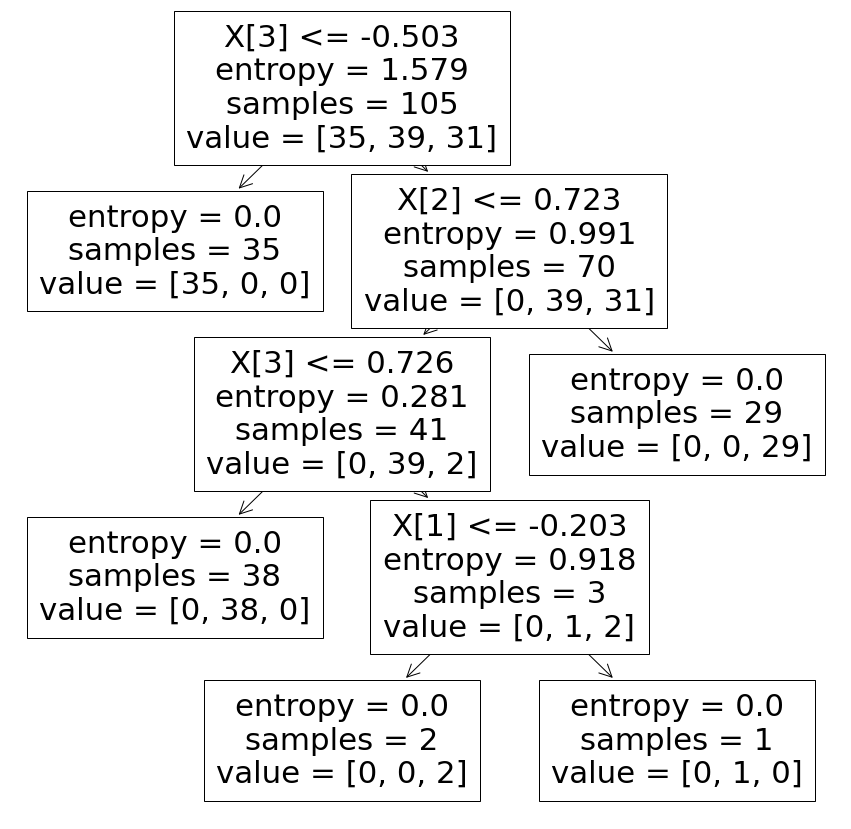

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dtc)